In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd
import seaborn as sns

# 데이터 불러오기

In [5]:
COVID_CSV = "covid_19_clean_complete.csv"

covid_df = pd.read_csv(COVID_CSV)
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


# 데이터 확인하기

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9535 non-null   object 
 1   Country/Region  31891 non-null  object 
 2   Lat             31891 non-null  float64
 3   Long            31891 non-null  float64
 4   Date            31891 non-null  object 
 5   Confirmed       31891 non-null  int64  
 6   Deaths          31891 non-null  int64  
 7   Recovered       31891 non-null  int64  
 8   Active          31890 non-null  float64
 9   WHO Region      31890 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.4+ MB


# 데이터 타입 수정

In [7]:
covid_df["Date"] = pd.to_datetime(covid_df["Date"])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  9535 non-null   object        
 1   Country/Region  31891 non-null  object        
 2   Lat             31891 non-null  float64       
 3   Long            31891 non-null  float64       
 4   Date            31891 non-null  datetime64[ns]
 5   Confirmed       31891 non-null  int64         
 6   Deaths          31891 non-null  int64         
 7   Recovered       31891 non-null  int64         
 8   Active          31890 non-null  float64       
 9   WHO Region      31890 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.4+ MB


In [8]:
lt_date = max(covid_df["Date"])
lt_date

Timestamp('2020-05-23 00:00:00')

In [9]:
covid_lt = covid_df[covid_df["Date"]==lt_date]
covid_lt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
31842,NaN,Afghanistan,33.93911,67.709953,2020-05-23,9998,216,1040,8742.0,Eastern Mediterranean
31843,NaN,Albania,41.15330,20.168300,2020-05-23,989,31,783,175.0,Europe
31844,NaN,Algeria,28.03390,1.659600,2020-05-23,8113,592,4426,3095.0,Africa
31845,NaN,Andorra,42.50630,1.521800,2020-05-23,762,51,653,58.0,Europe
31846,NaN,Angola,-11.20270,17.873900,2020-05-23,61,4,18,39.0,Africa


In [10]:
covid_sum_by_country = covid_lt[["Country/Region", "Confirmed", "Deaths", "Recovered"]]
covid_sum_by_country.head()

,Country/Region,Confirmed,Deaths,Recovered
31842,Afghanistan,9998,216,1040
31843,Albania,989,31,783
31844,Algeria,8113,592,4426
31845,Andorra,762,51,653
31846,Angola,61,4,18


In [12]:
covid_sum_by_country.sort_values(by="Deaths", ascending=False).style.background_gradient(cmap="Reds")

,Country/Region,Confirmed,Deaths,Recovered
31870,Brazil,347398,22013,142587
31865,Belgium,56810,9237,15155
31885,Canada,46847,3941,0
31883,Canada,26560,2157,0
31889,Chile,80287,673,26546
31858,Austria,16486,639,15037
31844,Algeria,8113,592,4426
31862,Bangladesh,32078,452,6486
31848,Argentina,11353,445,3530
31868,Bolivia,5915,240,609


In [13]:
# 날짜별 확진자, 사망자, 회복자 합계
import numpy as np

covid_date = covid_df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()
covid_date.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


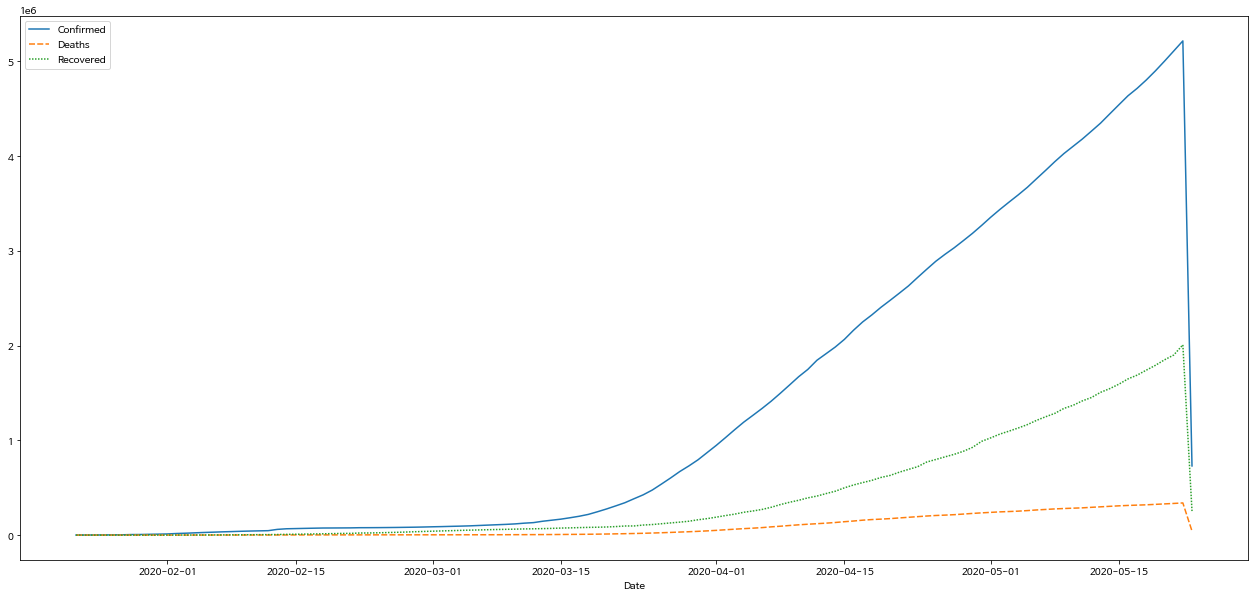

In [14]:
plt.figure(figsize=(22, 10))
sns.lineplot(data=covid_date)
plt.show()

# 지도 시각화

In [16]:
import folium

map = folium.Map()
map

In [17]:
# folium으로 서울 표시하기
map = folium.Map(location=[37.5642135, 127.0016985])
map

In [18]:
# 서울 확대해 보기
map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=15)
map

In [19]:
# CircleMarker 그리기
map = folium.Map(
    location=[37.5642135, 127.0016985], 
    zoom_start=13
)
seoul_cityhall_coord = [37.565577, 126.978082]

folium.CircleMarker(seoul_cityhall_coord, radius=100).add_to(map) # radius 반지름

#원을 만들어서 지도에 추가
map

In [20]:
# CircleMarker 그리기
map = folium.Map(
    location=[37.5642135, 127.0016985], 
    zoom_start=13
)
seoul_cityhall_coord = [37.565577, 126.978082]

folium.CircleMarker(seoul_cityhall_coord, 
                    radius=100,
                    color="#F7D358",
                    fill=True,
                    fill_color="#08088A").add_to(map) # radius 반지름

#원을 만들어서 지도에 추가
map

In [21]:
# CircleMarker 그리기
map = folium.Map(
    location=[37.5642135, 127.0016985], 
    zoom_start=13
)
seoul_cityhall_coord = [37.565577, 126.978082]

folium.CircleMarker(seoul_cityhall_coord, 
                    radius=100,
                    color="#F7D358",
                    fill=True,
                    fill_color="#08088A",
                    popup="여기는 시청입니다~!").add_to(map) # radius 반지름

map

In [22]:
# 국가별 최근 확진자 조회
covid_lt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
31842,NaN,Afghanistan,33.93911,67.709953,2020-05-23,9998,216,1040,8742.0,Eastern Mediterranean
31843,NaN,Albania,41.15330,20.168300,2020-05-23,989,31,783,175.0,Europe
31844,NaN,Algeria,28.03390,1.659600,2020-05-23,8113,592,4426,3095.0,Africa
31845,NaN,Andorra,42.50630,1.521800,2020-05-23,762,51,653,58.0,Europe
31846,NaN,Angola,-11.20270,17.873900,2020-05-23,61,4,18,39.0,Africa


In [23]:
map = folium.Map(location=[0, 0], zoom_start=3)

for n in covid_lt.index:
  # 1. 좌표 가지고 오기
  coords = [covid_lt['Lat'][n], covid_lt['Long'][n]]

  # 2. 확진자 수 가지고 오기
  radius = covid_lt["Confirmed"][n]
  radius = np.log(radius) *2

  popup_str = f"{covid_lt['Country/Region'][n]} / {covid_lt['Confirmed'][n]}"

  folium.CircleMarker(
      coords, radius=radius, popup=popup_str,
      color='red', fill=True, fill_color = 'red'
      
  ).add_to(map)

map